In [1]:
import pandas as pd
import pyreadstat as st
import pingouin as pg
import numpy as np
from tabulate import tabulate


path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\MECMT04\problem_set_5\ind.dta"

df, meta = st.read_dta(path)
df.head()

,pais,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
0,Albania,41.750000,29.129999,0.69,17.600000,2.34,59.599998,7.30,95.0,37.490002,19.010000,4.320000,1.140000,73.349998,36.599998,22.000000,25.0,-0.05
1,Algeria,16.799999,8.770000,2.84,42.200001,2.67,60.639999,2.40,80.0,21.889999,59.740002,24.000000,4.920000,70.220001,58.340000,37.000000,44.0,1.42
2,Angola,45.959999,5.660000,0.48,89.620003,6.81,6.900000,3.01,41.0,62.830002,72.120003,418.230011,1.080000,40.439999,120.070000,154.000000,260.0,2.49
3,Antigua and Barbuda,31.820000,3.930000,4.57,67.599998,1.70,783.119995,3.30,95.0,73.199997,19.770000,0.770000,64.940002,75.059998,66.620003,13.000000,15.0,1.91
4,Argentina,47.020000,5.050000,3.72,10.890000,2.46,389.809998,-0.79,56.0,11.520000,28.059999,1.040000,70.470001,73.839996,18.120001,17.200001,19.4,1.07


In [2]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,42.501173,16.987901,3.789938,38.256914,3.218025,316.797593,3.951790,80.845864,43.216729,29.542901,16.938580,69.170556,64.881667,65.695926,46.078086,67.285309,1.344383
std,21.404869,14.417187,4.883724,22.307395,1.761323,393.287203,3.855633,17.389701,21.297193,12.883346,54.473089,119.508157,11.900250,33.714128,40.540420,67.979517,2.591381
min,0.560000,0.000000,0.000000,0.000000,0.000000,0.500000,-13.120000,34.000000,0.000000,0.000000,-7.040000,0.060000,37.900002,14.520000,0.000000,0.000000,-26.700001
25%,26.947500,4.890000,0.430000,22.482500,1.762500,25.237500,2.100000,72.250000,28.777500,21.942501,2.462500,2.247500,55.297501,41.415000,13.000000,14.625000,0.690000
50%,43.330000,13.575000,1.755000,34.325001,2.715000,150.409996,3.945000,86.000000,39.395000,28.065000,5.245000,16.190001,69.230000,58.049999,32.000000,40.000000,1.475000
75%,57.849999,25.539999,5.650000,49.817501,4.327500,418.420006,5.775000,95.000000,57.470000,34.647501,12.035000,66.727503,73.527498,81.109999,77.000000,101.270000,2.320000
max,88.400002,63.250000,27.690001,124.410004,8.000000,1477.089966,25.700001,99.000000,110.699997,88.029999,516.229980,597.859985,81.080002,199.500000,167.000000,286.000000,6.820000


In [2]:
ndf = df.iloc[:,1:].values

In [4]:
data_cov = np.cov(ndf, rowvar=False)
data_cov_inv = np.linalg.inv(data_cov)
data_cov_inv_d = np.diag(data_cov_inv)
data_cov_d = np.diag(data_cov)
com2 = data_cov_d - (1/data_cov_inv_d)
# np.fill_diagonal(data_cov, com2)
data_cov_d - com2

array([3.86524105e+02, 7.09664171e+01, 1.01871202e+01, 8.87414050e+01,
       8.88225289e-01, 1.75912382e+04, 9.82721553e+00, 1.04992148e+02,
       9.21848902e+01, 8.92982844e+01, 2.17161902e+03, 2.37429591e+03,
       1.53725181e+01, 3.38416807e+02, 2.86006743e+01, 7.60571507e+01,
       4.93115321e+00])

In [5]:
data_cor = np.corrcoef(ndf, rowvar=False)
data_inv = np.linalg.inv(data_cor)
data_inv_d = np.diag(data_inv)
com = 1 - (1/data_inv_d)
com


array([0.15637115, 0.65857774, 0.57288071, 0.82166829, 0.71368417,
       0.88626954, 0.33894281, 0.65280568, 0.79675727, 0.46199564,
       0.26815413, 0.83375839, 0.89144924, 0.70226626, 0.98259797,
       0.98354174, 0.26567892])

In [6]:
np.fill_diagonal(data_cor, com)
pd.DataFrame(data_cor)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.156371,0.098845,-0.156471,-0.039088,0.002692,-0.101030,-0.084746,0.033274,0.098108,-0.124588,-0.083126,-0.175285,-0.122564,-0.062476,0.090987,0.082685,-0.082620
1,0.098845,0.658578,-0.552610,-0.300686,0.572997,-0.594873,-0.112025,-0.522478,-0.065946,-0.365253,0.158246,-0.467013,-0.662370,-0.266694,0.691661,0.689919,0.151596
2,-0.156471,-0.552610,0.572881,0.291128,-0.469829,0.631098,0.124355,0.431409,0.012041,0.309316,-0.072819,0.604969,0.538880,0.190587,-0.544706,-0.522229,-0.040449
3,-0.039088,-0.300686,0.291128,0.821668,-0.260647,0.206609,0.183818,0.265714,0.788161,0.440806,0.084742,0.169124,0.227478,0.766188,-0.268571,-0.276670,-0.085284
4,0.002692,0.572997,-0.469829,-0.260647,0.713684,-0.592825,-0.089967,-0.644678,-0.166724,-0.097107,0.212431,-0.435630,-0.789836,-0.133517,0.816126,0.819290,0.395520
5,-0.101030,-0.594873,0.631098,0.206609,-0.592825,0.886270,0.048097,0.398929,0.047346,0.078381,-0.134802,0.894852,0.662788,0.109216,-0.655877,-0.612023,-0.249795
6,-0.084746,-0.112025,0.124355,0.183818,-0.089967,0.048097,0.338943,0.132220,0.047748,0.118386,-0.189137,0.039556,0.115194,0.310227,-0.023426,-0.062265,-0.011648
7,0.033274,-0.522478,0.431409,0.265714,-0.644678,0.398929,0.132220,0.652806,0.235207,0.096459,-0.222487,0.297799,0.728644,0.175741,-0.758446,-0.777121,-0.272710
8,0.098108,-0.065946,0.012041,0.788161,-0.166724,0.047346,0.047748,0.235207,0.796757,0.093774,-0.027706,0.016006,0.126872,0.690342,-0.167540,-0.177963,-0.098857
9,-0.124588,-0.365253,0.309316,0.440806,-0.097107,0.078381,0.118386,0.096459,0.093774,0.461996,0.219737,0.067847,0.118112,0.353734,-0.131225,-0.137038,-0.046110


In [7]:
# from sklearn.utils.extmath import randomized_svd
# C, D, V = randomized_svd(data_cor, n_components=17, random_state=1234567890)
C, D, V = np.linalg.svd(data_cor, full_matrices=False)
loadings = C * np.sqrt(D)

pd.DataFrame(loadings)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.101058,0.007290,-0.252898,-0.150565,-0.053018,0.068805,-0.101718,-0.305245,-0.036548,0.110381,0.128617,0.020529,-0.007081,-0.034541,0.000441,-0.003370,0.000488
1,-0.749810,-0.004413,-0.138453,-0.242233,-0.039372,0.063383,0.078445,0.163825,-0.156510,-0.005539,0.075906,0.151742,-0.028229,-0.024250,0.030119,-0.006379,-0.004987
2,0.655062,-0.020089,0.368260,0.109380,0.063522,-0.095986,0.044752,-0.073731,0.160355,-0.057729,0.110688,0.153478,-0.038762,0.043502,0.015622,0.002712,-0.003296
3,0.428423,0.821048,0.043226,-0.038063,-0.060839,-0.053437,0.053598,-0.000026,0.075401,0.163421,-0.113134,0.031320,-0.023545,-0.038617,0.057404,-0.006235,-0.000641
4,-0.812403,0.109483,0.201969,0.011485,0.059766,-0.151123,0.048312,0.039996,0.106562,0.001116,0.046570,-0.016316,-0.075622,-0.098525,-0.061782,-0.005800,0.001089
5,0.779254,-0.194855,0.413104,-0.309798,-0.056555,0.091977,0.029945,-0.059707,-0.111860,-0.053649,-0.052444,-0.046107,-0.154474,-0.005096,0.003030,0.001630,0.002205
6,0.139841,0.195559,0.044031,0.120863,0.482904,0.264947,-0.199000,0.057630,0.030670,-0.015352,-0.004007,0.016485,-0.029842,-0.027587,0.007585,-0.002257,-0.002023
7,0.733181,-0.021939,-0.312356,0.074128,0.068918,-0.011473,0.046427,-0.067662,-0.071447,-0.010759,-0.136457,0.153432,0.004640,-0.015296,-0.070477,0.003147,0.001359
8,0.259067,0.762519,-0.262680,-0.353429,-0.050712,-0.109302,-0.134658,0.009943,0.034268,-0.200760,0.021926,-0.003614,0.015802,0.000228,-0.002166,0.003050,0.003173
9,0.237011,0.369956,0.272165,0.466660,-0.143296,0.030431,0.033507,-0.068477,-0.161317,-0.125322,0.033762,-0.005406,0.044701,-0.058941,0.020432,-0.004821,0.000245


In [8]:
# Definir las columnas a excluir
columns_to_exclude = [6, 8, 9, 10, 12, 13, 15]

# Crear un array con las columnas que se van a conservar
columns_to_keep = np.setdiff1d(np.arange(loadings.shape[1]), columns_to_exclude)

# Filtrar el array
filtered_data = loadings[:, columns_to_keep]

# Definir las filas a excluir (ten en cuenta que los índices son 0-basados)
rows_to_exclude = [6, 8, 9, 10, 12, 13, 15]

# Crear un array con las filas que se van a conservar
rows_to_keep = np.setdiff1d(np.arange(D.shape[0]), rows_to_exclude)

# Filtrar el array
filtered_data2 = D[rows_to_keep]
filtered_data2

array([6.39666517e+00, 2.26446641e+00, 1.18074810e+00, 7.09976599e-01,
       5.42330222e-01, 2.82134190e-01, 1.82378555e-01, 8.48464068e-02,
       1.88111167e-02, 5.87278275e-04])

In [25]:
pd.DataFrame(filtered_data)

,0,1,2,3,4,5,6,7,8,9
0,-0.101058,0.007290,-0.252898,-0.150565,-0.053018,0.068805,-0.305245,0.020529,0.000441,0.000488
1,-0.749810,-0.004413,-0.138453,-0.242233,-0.039372,0.063383,0.163825,0.151742,0.030119,-0.004987
2,0.655062,-0.020089,0.368260,0.109380,0.063522,-0.095986,-0.073731,0.153478,0.015622,-0.003296
3,0.428423,0.821048,0.043226,-0.038063,-0.060839,-0.053437,-0.000026,0.031320,0.057404,-0.000641
4,-0.812403,0.109483,0.201969,0.011485,0.059766,-0.151123,0.039996,-0.016316,-0.061782,0.001089
5,0.779254,-0.194855,0.413104,-0.309798,-0.056555,0.091977,-0.059707,-0.046107,0.003030,0.002205
6,0.139841,0.195559,0.044031,0.120863,0.482904,0.264947,0.057630,0.016485,0.007585,-0.002023
7,0.733181,-0.021939,-0.312356,0.074128,0.068918,-0.011473,-0.067662,0.153432,-0.070477,0.001359
8,0.259067,0.762519,-0.262680,-0.353429,-0.050712,-0.109302,0.009943,-0.003614,-0.002166,0.003173
9,0.237011,0.369956,0.272165,0.466660,-0.143296,0.030431,-0.068477,-0.005406,0.020432,0.000245


In [47]:
def varimax(loadings):
        """
        Perform varimax (orthogonal) rotation, with optional Kaiser normalization.

        Parameters
        ----------
        loadings : array-like
            The loading matrix.

        Returns
        -------
        loadings : :obj:`numpy.ndarray`, shape (``n_features``, ``n_factors``)
            The loadings matrix.
        rotation_mtx : :obj:`numpy.ndarray`, shape (``n_factors``, ``n_factors``)
            The rotation matrix.
        """
        X = loadings.copy()
        n_rows, n_cols = X.shape
        if n_cols < 2:
            return X

        # normalize the loadings matrix
        # using sqrt of the sum of squares (Kaiser)
        if False:
            normalized_mtx = np.apply_along_axis(
                lambda x: np.sqrt(np.sum(x**2)), 1, X.copy()
            )
            X = (X.T / normalized_mtx).T

        # initialize the rotation matrix
        # to N x N identity matrix
        rotation_mtx = np.eye(n_cols)

        d = 0
        for _ in range(5000):
            old_d = d

            # take inner product of loading matrix
            # and rotation matrix
            basis = np.dot(X, rotation_mtx)

            # transform data for singular value decomposition using updated formula :
            # B <- t(x) %*% (z^3 - z %*% diag(drop(rep(1, p) %*% z^2))/p)
            diagonal = np.diag(np.squeeze(np.repeat(1, n_rows).dot(basis**2)))
            transformed = X.T.dot(basis**3 - basis.dot(diagonal) / n_rows)

            # perform SVD on
            # the transformed matrix
            U, S, V = np.linalg.svd(transformed)

            # take inner product of U and V, and sum of S
            rotation_mtx = np.dot(U, V)
            d = np.sum(S)

            # check convergence
            if d < old_d * (1 + 1e-5):
                break

        # take inner product of loading matrix
        # and rotation matrix
        X = np.dot(X, rotation_mtx)

        # de-normalize the data
        if False:
            X = X.T * normalized_mtx
        else:
            X = X.T

        # convert loadings matrix to data frame
        loadings = X.T.copy()
        return loadings

pd.DataFrame(varimax(filtered_data))

,0,1,2,3,4,5,6,7,8,9
0,-0.035535,0.028471,-0.142826,-0.171154,-0.078540,0.096696,-0.361449,0.010202,0.000226,0.000021
1,-0.620969,-0.114500,-0.316393,-0.371311,-0.087171,0.125548,0.113718,0.132206,0.077330,-0.001898
2,0.429955,0.084884,0.507748,0.326270,0.083218,-0.176704,-0.008369,0.152391,0.042560,-0.001787
3,0.170497,0.880293,0.098539,0.231458,0.015639,-0.007794,0.016392,0.028642,0.056169,-0.000013
4,-0.789595,-0.100703,-0.235649,-0.006221,-0.058434,-0.183551,0.118218,-0.005262,-0.068718,-0.001603
5,0.472893,0.039905,0.832088,0.025310,-0.001947,0.073450,-0.057229,-0.047815,0.001321,0.002228
6,0.054680,0.159030,0.018459,0.060350,0.589911,-0.024255,0.021310,0.009526,0.000913,0.000515
7,0.769855,0.157643,0.055679,-0.002768,0.093011,-0.008636,-0.137376,0.171534,-0.037438,0.002817
8,0.115098,0.888433,-0.050669,-0.200198,-0.093310,0.010555,-0.055343,0.002409,-0.002787,0.002485
9,0.088155,0.268280,0.034203,0.653419,0.035087,0.016100,0.045574,0.002809,0.005993,-0.000301


para el calculo solo se utilizan aquellos vectores con autovalores positivos

In [9]:
commmmmmmmm = np.diag(1 - np.sum((filtered_data**2), axis=1))

In [43]:
1 -commmmmmmmm

array([[0.19803424, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 0.69644466, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 0.61958412, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.87181667, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.      

In [10]:
pd.DataFrame(commmmmmmmm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.801966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.303555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.380416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.128183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.254997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.070802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.618607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.488517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
pd.DataFrame(loadings.T @ loadings)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,6.396665e+00,1.364001e-16,5.461177e-16,8.777150e-17,1.809006e-17,3.958399e-17,-4.936733e-17,-9.623859e-17,-9.586647e-17,2.175525e-18,-1.536479e-18,3.526750e-17,8.487406e-18,-2.341173e-18,3.095101e-17,2.898862e-18,-2.832519e-18
1,1.364001e-16,2.264466e+00,1.041359e-16,6.714656e-17,1.364523e-17,1.200280e-17,-1.933966e-17,7.012893e-18,-3.551193e-17,-4.129880e-17,-1.505317e-17,-2.577682e-17,1.924884e-17,1.830109e-18,-1.841359e-17,2.801094e-18,5.117869e-19
2,5.461177e-16,1.041359e-16,1.180748e+00,-2.244336e-17,-2.555257e-17,-6.604593e-17,-1.557978e-17,-1.474336e-16,2.956047e-17,-2.645601e-17,1.187688e-17,-7.339750e-18,-4.038053e-18,1.549218e-17,-3.895428e-18,1.347905e-18,-2.239675e-18
3,8.777150e-17,6.714656e-17,-2.244336e-17,7.099766e-01,-1.108648e-17,-6.093919e-17,5.479105e-17,4.271366e-17,-7.073665e-18,3.300907e-17,6.715774e-18,-3.069329e-17,1.719697e-17,-2.256124e-17,-1.283357e-18,-1.086860e-20,4.412683e-19
4,1.809006e-17,1.364523e-17,-2.555257e-17,-1.108648e-17,5.423302e-01,1.077298e-16,2.239438e-17,-7.209131e-17,-1.602163e-17,-7.222589e-18,-1.820283e-17,-1.987753e-19,-1.742219e-17,-7.925325e-18,-1.288025e-17,2.722566e-18,1.477059e-19
5,3.958399e-17,1.200280e-17,-6.604593e-17,-6.093919e-17,1.077298e-16,2.821342e-01,-2.544487e-17,1.141666e-17,-1.696998e-17,6.718059e-17,1.621676e-17,1.059256e-17,-1.087360e-17,-7.882452e-18,6.368520e-18,6.021980e-19,-5.547724e-19
6,-4.936733e-17,-1.933966e-17,-1.557978e-17,5.479105e-17,2.239438e-17,-2.544487e-17,2.008120e-01,9.550818e-18,5.009779e-17,1.124679e-18,1.842905e-17,3.391036e-18,-7.809306e-18,-1.411711e-17,-8.150161e-18,5.830501e-19,9.553411e-20
7,-9.623859e-17,7.012893e-18,-1.474336e-16,4.271366e-17,-7.209131e-17,1.141666e-17,9.550818e-18,1.823786e-01,1.322977e-17,9.578496e-18,-4.617746e-17,-2.481087e-17,9.377164e-18,-1.395844e-17,-1.310928e-17,3.637551e-18,1.556776e-18
8,-9.586647e-17,-3.551193e-17,2.956047e-17,-7.073665e-18,-1.602163e-17,-1.696998e-17,5.009779e-17,1.322977e-17,1.550442e-01,4.638653e-17,2.830823e-17,1.813977e-17,5.311420e-18,-2.034991e-17,-9.999379e-18,2.961456e-20,1.265848e-19
9,2.175525e-18,-4.129880e-17,-2.645601e-17,3.300907e-17,-7.222589e-18,6.718059e-17,1.124679e-18,9.578496e-18,4.638653e-17,1.239111e-01,1.213966e-17,1.744854e-18,2.064450e-17,-7.129730e-18,-2.159666e-18,-1.834594e-18,3.478722e-19


In [12]:
loadings.shape

(17, 17)

In [13]:
identity_matrix = np.eye(17)

In [14]:
pd.DataFrame(loadings @ identity_matrix @ loadings.T + commmmmmmmm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.041663,0.114747,-0.164043,-0.045485,0.005216,-0.121751,-0.048580,-0.007456,0.084058,-0.135124,-0.019058,-0.149922,-0.086877,-0.045661,0.059090,0.057880,-0.029673
1,0.114747,1.037867,-0.578296,-0.331583,0.563400,-0.553580,-0.150233,-0.512987,-0.093188,-0.302591,0.117584,-0.478346,-0.641699,-0.204704,0.688965,0.681577,0.181677
2,-0.164043,-0.578296,1.046703,0.274625,-0.423890,0.604029,0.117166,0.382011,0.037823,0.273903,-0.095780,0.577424,0.552462,0.194508,-0.537691,-0.527518,-0.118034
3,-0.045485,-0.331583,0.274625,1.050148,-0.238329,0.194930,0.166565,0.288199,0.707516,0.373978,0.081999,0.171727,0.227383,0.768375,-0.261594,-0.267026,-0.106485
4,0.005216,0.563400,-0.423890,-0.238329,1.031319,-0.594428,-0.093091,-0.665876,-0.173308,-0.120476,0.190360,-0.458114,-0.774107,-0.139071,0.812545,0.814334,0.338250
5,-0.121751,-0.553580,0.604029,0.194930,-0.594428,1.042929,0.040879,0.431894,0.045982,0.113158,-0.145914,0.841306,0.648963,0.117078,-0.656948,-0.616491,-0.218847
6,-0.048580,-0.150233,0.117166,0.166565,-0.093091,0.040879,1.042450,0.111336,0.108463,0.099337,-0.091368,0.052437,0.104500,0.239420,-0.050902,-0.077029,0.034455
7,-0.007456,-0.512987,0.382011,0.288199,-0.665876,0.431894,0.111336,1.026262,0.216301,0.118292,-0.248914,0.293558,0.704105,0.170245,-0.745331,-0.760657,-0.259913
8,0.084058,-0.093188,0.037823,0.707516,-0.173308,0.045982,0.108463,0.216301,1.060351,0.126850,0.009754,0.015509,0.101653,0.615942,-0.175922,-0.181552,-0.097629
9,-0.135124,-0.302591,0.273903,0.373978,-0.120476,0.113158,0.099337,0.118292,0.126850,1.049487,0.176379,0.073873,0.116573,0.370852,-0.130583,-0.135458,-0.019703


In [15]:
pd.DataFrame(ndf).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.098845,-0.156471,-0.039088,0.002692,-0.101030,-0.084746,0.033274,0.098108,-0.124588,-0.083126,-0.175285,-0.122564,-0.062476,0.090987,0.082685,-0.082620
1,0.098845,1.000000,-0.552610,-0.300686,0.572997,-0.594873,-0.112025,-0.522478,-0.065946,-0.365253,0.158246,-0.467013,-0.662370,-0.266694,0.691661,0.689919,0.151596
2,-0.156471,-0.552610,1.000000,0.291128,-0.469829,0.631098,0.124355,0.431409,0.012041,0.309316,-0.072819,0.604969,0.538880,0.190587,-0.544706,-0.522229,-0.040449
3,-0.039088,-0.300686,0.291128,1.000000,-0.260647,0.206609,0.183818,0.265714,0.788161,0.440806,0.084742,0.169124,0.227478,0.766188,-0.268571,-0.276670,-0.085284
4,0.002692,0.572997,-0.469829,-0.260647,1.000000,-0.592825,-0.089967,-0.644678,-0.166724,-0.097107,0.212431,-0.435630,-0.789836,-0.133517,0.816126,0.819290,0.395520
5,-0.101030,-0.594873,0.631098,0.206609,-0.592825,1.000000,0.048097,0.398929,0.047346,0.078381,-0.134802,0.894852,0.662788,0.109216,-0.655877,-0.612023,-0.249795
6,-0.084746,-0.112025,0.124355,0.183818,-0.089967,0.048097,1.000000,0.132220,0.047748,0.118386,-0.189137,0.039556,0.115194,0.310227,-0.023426,-0.062265,-0.011648
7,0.033274,-0.522478,0.431409,0.265714,-0.644678,0.398929,0.132220,1.000000,0.235207,0.096459,-0.222487,0.297799,0.728644,0.175741,-0.758446,-0.777121,-0.272710
8,0.098108,-0.065946,0.012041,0.788161,-0.166724,0.047346,0.047748,0.235207,1.000000,0.093774,-0.027706,0.016006,0.126872,0.690342,-0.167540,-0.177963,-0.098857
9,-0.124588,-0.365253,0.309316,0.440806,-0.097107,0.078381,0.118386,0.096459,0.093774,1.000000,0.219737,0.067847,0.118112,0.353734,-0.131225,-0.137038,-0.046110


In [16]:
commu = np.sum((C**2) * D, axis=1)
commu

array([0.23969732, 0.73431159, 0.66628753, 0.92196505, 0.77632239,
       0.97212737, 0.42384317, 0.70532929, 0.91746   , 0.56096941,
       0.40635286, 0.89427472, 0.92156758, 0.8023279 , 1.00367713,
       1.00500028, 0.38697486])

In [17]:
comm = np.sum(loadings**2, axis=1)
comm

array([0.23969732, 0.73431159, 0.66628753, 0.92196505, 0.77632239,
       0.97212737, 0.42384317, 0.70532929, 0.91746   , 0.56096941,
       0.40635286, 0.89427472, 0.92156758, 0.8023279 , 1.00367713,
       1.00500028, 0.38697486])

In [18]:
(loadings**2).sum(axis=1)

array([0.23969732, 0.73431159, 0.66628753, 0.92196505, 0.77632239,
       0.97212737, 0.42384317, 0.70532929, 0.91746   , 0.56096941,
       0.40635286, 0.89427472, 0.92156758, 0.8023279 , 1.00367713,
       1.00500028, 0.38697486])

In [19]:
1 - comm

array([ 0.76030268,  0.26568841,  0.33371247,  0.07803495,  0.22367761,
        0.02787263,  0.57615683,  0.29467071,  0.08254   ,  0.43903059,
        0.59364714,  0.10572528,  0.07843242,  0.1976721 , -0.00367713,
       -0.00500028,  0.61302514])

In [20]:
pd.DataFrame(D).sort_values(by=0, ascending=False)

,0
0,6.396665
1,2.264466
2,1.180748
3,0.709977
4,0.542330
5,0.282134
6,0.200812
7,0.182379
8,0.155044
9,0.123911


In [21]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer


# Create correlation matrix
corr_matrix = np.corrcoef(ndf, rowvar=False)


# Perform PAF with 3 factors
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(corr_matrix)


# Print factor loadings
print(fa.loadings_)

[[-0.11972118 -0.04850968 -0.62400429]
 [-0.8483749  -0.32393948 -0.36858646]
 [ 0.84726948  0.17502433  0.45804407]
 [ 0.33603678  0.91087375  0.23865548]
 [-0.93303751 -0.31670408 -0.13034895]
 [ 0.91774827  0.12104883  0.29891077]
 [ 0.24435814  0.29011378  0.12265097]
 [ 0.90895445  0.34348227  0.06084383]
 [ 0.18316068  0.92059462 -0.14237454]
 [ 0.19819816  0.49581465  0.60005745]
 [-0.60738841 -0.05062193  0.2046808 ]
 [ 0.87415656  0.05963131  0.35173824]
 [ 0.94693852  0.24843826  0.19016785]
 [ 0.15384998  0.94671698  0.23770909]
 [-0.93938393 -0.28509504 -0.17630559]
 [-0.93496382 -0.30131583 -0.16550802]
 [-0.62993707 -0.32836439 -0.02248052]]


In [22]:
eigenvalues, _ = fa.get_eigenvalues()
pd.DataFrame(eigenvalues)

,0
0,1.065176e+01
1,2.284995e+00
2,1.363616e+00
3,1.121937e+00
4,6.049540e-01
5,4.668105e-01
6,2.264915e-01
7,1.594021e-01
8,4.306296e-02
9,3.610470e-02


In [23]:
ndf_c = ndf.corr()
ndf_c

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [16]:
from numpy.linalg import eigh
eigenvalues, eigenvectors = eigh(ndf_c)
n = ndf_c.shape[0]
loadings = eigenvectors[:, :n] * np.sqrt(eigenvalues[:n])
pd.DataFrame(loadings)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.000576,-0.012401,-0.004890,-0.011105,0.052008,-0.026834,0.007920,-0.042541,-0.044066,-0.116002,0.754541,0.175109,-0.222271,-0.120802,-0.549537,-0.007795,-0.113838
1,0.001588,0.033611,0.020530,-0.034867,0.152239,0.075345,0.086556,-0.252672,0.386454,-0.137176,-0.144885,-0.202341,-0.160572,-0.019713,-0.183219,-0.007112,-0.779200
2,0.001061,-0.000802,-0.006198,0.042764,0.025369,-0.080810,-0.238060,0.177238,0.394956,-0.148412,0.184783,0.114117,-0.077734,0.073503,0.435382,-0.015077,0.690259
3,-0.000842,-0.037915,0.039226,-0.212719,-0.137805,-0.117478,-0.023760,-0.101543,0.072357,0.035607,-0.043114,0.050413,-0.126889,-0.027863,-0.025058,0.830149,0.436522
4,0.001347,0.022744,0.011933,-0.023455,0.116647,-0.261742,0.287510,0.236975,0.011628,0.035725,0.013879,0.051451,-0.071862,0.083935,0.213382,0.132745,-0.835608
5,0.007071,0.163530,0.123014,0.009904,-0.046531,0.009533,0.070242,-0.058817,-0.089876,0.032417,0.122425,-0.181672,-0.393682,-0.022462,0.295472,-0.196887,0.780160
6,-0.002506,0.014491,-0.030286,0.022259,-0.036316,-0.075744,0.024484,-0.091985,-0.050500,-0.219823,0.227208,-0.491199,0.363764,0.644633,0.042571,0.253832,0.156085
7,-0.001113,0.006839,0.026471,-0.017859,-0.118614,0.160671,0.290367,0.209492,0.155847,-0.257665,-0.050382,0.131448,0.192827,0.024176,-0.317564,-0.041360,0.761595
8,-0.000190,0.020491,-0.047359,0.208198,-0.074217,-0.090930,0.037862,-0.042110,0.043381,0.017275,-0.195243,0.034917,-0.325797,-0.007667,-0.377724,0.759393,0.264447
9,0.000198,0.018945,-0.004128,0.060653,0.028377,0.062748,0.159284,-0.175303,0.109941,0.288973,0.281959,0.206298,0.459909,-0.209176,0.423737,0.465271,0.257189


In [22]:
np.sum(loadings[:,:1]**2)

0.008838757376057054

In [6]:
ndf_c_i = np.linalg.inv(ndf_c.values)
pd.DataFrame(ndf_c_i)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.185355,0.058237,0.029042,0.128969,0.184693,-0.493029,0.086424,-0.283127,-0.305023,0.008422,0.131040,0.444643,0.390460,0.171348,-0.593746,0.307358,0.098191
1,0.058237,2.928924,0.075500,0.073876,0.119542,1.426400,-0.195500,0.101648,-0.835116,0.609032,-0.233036,-0.699109,0.039501,0.894639,0.519252,-1.908286,0.266698
2,0.029042,0.075500,2.341266,-0.685957,0.165368,-0.466093,-0.037158,-0.453455,0.765956,-0.280856,-0.020535,-0.544859,-0.039933,-0.110173,0.960626,-0.830785,-0.358122
3,0.128969,0.073876,-0.685957,5.607528,0.259895,-0.435787,-0.386907,0.318232,-3.581204,-1.360650,-0.393007,0.126036,0.666852,-0.985604,-0.247866,1.021221,-0.205682
4,0.184693,0.119542,0.165368,0.259895,3.492647,0.955001,0.055811,0.043476,-0.153609,-0.132173,-0.066639,-0.619074,0.501472,0.058379,0.112191,-1.994993,-0.415130
5,-0.493029,1.426400,-0.466093,-0.435787,0.955001,8.792720,-0.283284,0.719003,-0.075450,0.605227,-0.309982,-5.895046,-1.220055,0.482946,5.435622,-5.424574,0.505630
6,0.086424,-0.195500,-0.037158,-0.386907,0.055811,-0.283284,1.512728,-0.245663,0.792332,0.055166,0.436459,0.237086,-0.742304,-0.795368,-2.632181,1.605874,0.089760
7,-0.283127,0.101648,-0.453455,0.318232,0.043476,0.719003,-0.245663,2.880231,-0.490491,0.093727,-0.062488,-0.129828,-0.380198,-0.032782,0.001141,1.928479,0.071704
8,-0.305023,-0.835116,0.765956,-3.581204,-0.153609,-0.075450,0.792332,-0.490491,4.920225,0.984300,0.485756,0.187701,-0.607087,-1.569667,-0.200702,0.124905,0.092539
9,0.008422,0.609032,-0.280856,-1.360650,-0.132173,0.605227,0.055166,0.093727,0.984300,1.858721,-0.221326,-0.057297,-0.163245,-0.167218,0.039669,-0.198140,0.167137


In [9]:
ndf_c_i_d = np.diag(ndf_c_i)
pd.DataFrame(ndf_c_i_d)

,0
0,1.185355
1,2.928924
2,2.341266
3,5.607528
4,3.492647
5,8.792720
6,1.512728
7,2.880231
8,4.920225
9,1.858721


In [11]:
com = 1 - (1 / ndf_c_i_d)
pd.DataFrame(com)

,0
0,0.156371
1,0.658578
2,0.572881
3,0.821668
4,0.713684
5,0.886270
6,0.338943
7,0.652806
8,0.796757
9,0.461996


In [12]:
res = 1 - com
pd.DataFrame(res)

,0
0,0.843629
1,0.341422
2,0.427119
3,0.178332
4,0.286316
5,0.113730
6,0.661057
7,0.347194
8,0.203243
9,0.538004


In [13]:
ndf_c_res = ndf_c - res
pd.DataFrame(ndf_c_res)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
x1,0.156371,-0.242578,-0.583590,-0.217420,-0.283624,-0.214761,-0.745803,-0.313921,-0.105135,-0.662593,-0.814972,-0.341526,-0.231114,-0.360210,0.073585,0.066227,-0.816941
x2,-0.744784,0.658578,-0.979730,-0.479018,0.286681,-0.708603,-0.773082,-0.869673,-0.269188,-0.903257,-0.573600,-0.633255,-0.770920,-0.564428,0.674259,0.673461,-0.582725
x3,-1.000100,-0.894033,0.572881,0.112796,-0.756145,0.517367,-0.536702,0.084215,-0.191202,-0.228688,-0.804665,0.438727,0.430330,-0.107147,-0.562108,-0.538687,-0.774770
x4,-0.882717,-0.642109,-0.135991,0.821668,-0.546963,0.092879,-0.477239,-0.081481,0.584918,-0.097199,-0.647103,0.002883,0.118927,0.468455,-0.285973,-0.293129,-0.819605
x5,-0.840937,0.231575,-0.896949,-0.438979,0.713684,-0.706556,-0.751024,-0.991872,-0.369966,-0.635112,-0.519415,-0.601871,-0.898386,-0.431250,0.798724,0.802832,-0.338801
x6,-0.944659,-0.936295,0.203978,0.028278,-0.879141,0.886270,-0.612960,0.051735,-0.155896,-0.459623,-0.866647,0.728610,0.554238,-0.188518,-0.673279,-0.628481,-0.984116
x7,-0.928374,-0.453447,-0.302765,0.005487,-0.376283,-0.065633,0.338943,-0.214974,-0.155495,-0.419619,-0.920983,-0.126685,0.006643,0.012494,-0.040828,-0.078723,-0.745969
x8,-0.810355,-0.863900,0.004290,0.087382,-0.930993,0.285199,-0.528837,0.652806,0.031964,-0.441545,-0.954333,0.131557,0.620093,-0.121993,-0.775848,-0.793579,-1.007031
x9,-0.745521,-0.407368,-0.415079,0.609829,-0.453040,-0.066384,-0.613309,-0.111987,0.796757,-0.444230,-0.759552,-0.150236,0.018321,0.392608,-0.184942,-0.194421,-0.833178
x10,-0.968217,-0.706675,-0.117803,0.262474,-0.383423,-0.035349,-0.542672,-0.250735,-0.109468,0.461996,-0.512109,-0.098395,0.009561,0.056000,-0.148627,-0.153496,-0.780432


In [15]:
from numpy.linalg import eigh
eigenvalues, eigenvectors = eigh(ndf_c_res)


# # Cálculo de las cargas factoriales finales
# n = ndf_c.shape[0]
# loadings = eigenvectors[:, :n] * np.sqrt(eigenvalues[:n])
# pd.DataFrame(loadings)

array([-6.44180856, -0.56130361, -0.02658711,  0.01061584,  0.10061556,
        0.18863254,  0.23538117,  0.33894647,  0.35808824,  0.55319958,
        0.78701612,  0.87683825,  1.25592072,  1.59609243,  2.287309  ,
        2.71228253,  6.71616049])

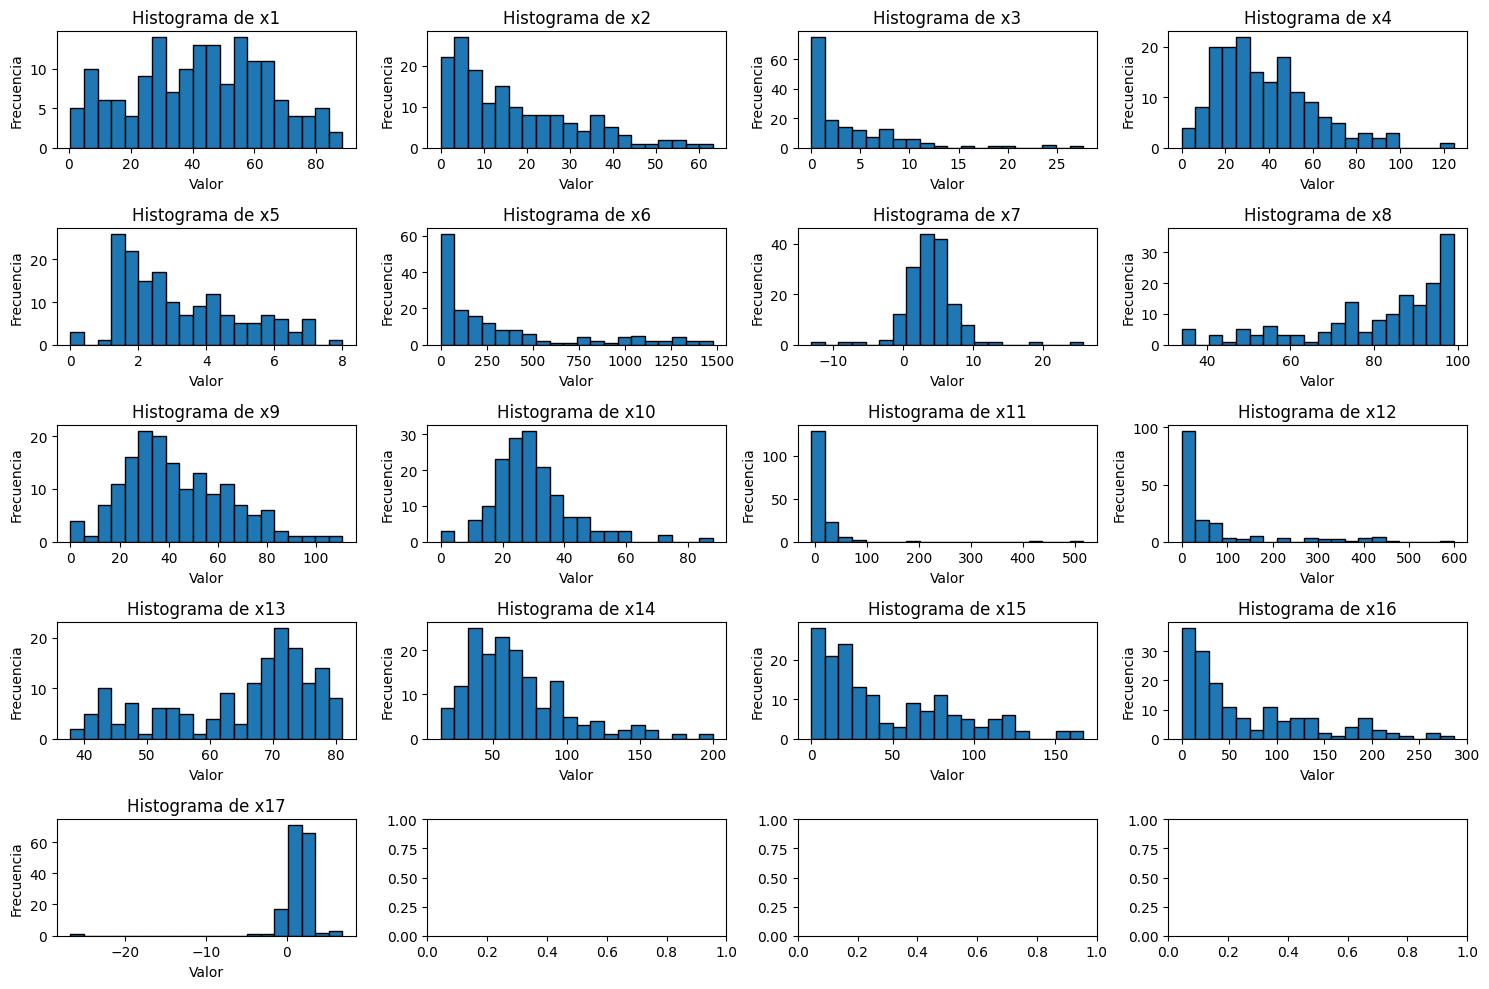

In [5]:
import matplotlib.pyplot as plt

# Crear una figura con 8 subgráficas (2x4)
fig, axs = plt.subplots(5, 4, figsize=(15, 10))

# Aplanar el array de ejes para facilitar el acceso
axs = axs.flatten()

# Iterar sobre las columnas del DataFrame y los ejes
for i, col in enumerate(ndf.columns):
    axs[i].hist(ndf[col], bins=20, edgecolor='black')
    axs[i].set_title(f'Histograma de {col}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')

# Ajustar el layout para que no se sobrepongan los títulos
plt.tight_layout()

# Mostrar los histogramas
plt.show()

In [34]:
import numpy as np
import scipy.stats as stats

def mardia_test(data: np.ndarray, cov: bool = True):
    """
    Mardia's multivariate skewness and kurtosis.
    Calculates the Mardia's multivariate skewness and kurtosis coefficients
    as well as their corresponding statistical test. For large sample size
    the multivariate skewness is asymptotically distributed as a Chi-square
    random variable; here it is corrected for small sample size. However,
    both uncorrected and corrected skewness statistic are presented. Likewise,
    the multivariate kurtosis it is distributed as a unit-normal.

     Syntax: function [Mskekur] = Mskekur(X,c,alpha)

     Inputs:
          X - multivariate data matrix [Size of matrix must be n(data)-by-p(variables)].
          cov - boolean to whether to normalize the covariance matrix by n (c=1[default]) or by n-1 (c~=1)

     Outputs:
          - skewness test statistic
          - kurtosis test statistic
          - significance value for skewness
          - significance value for kurtosis
    """
    n, p = data.shape

    if cov:
        S = ((n - 1)/n) * np.cov(data.T)
    else:
        S = np.cov(data.T)

    # calculate mean
    data_mean = data.mean(axis=0)
    
    # inverse - check if singular matrix
    try:
        iS = np.linalg.inv(S)
    except Exception as e:
        # print for now
        print(e)
        return 0.0, 0.0, 0.0, 0.0
    
    # squared-Mahalanobis' distances matrix
    D: np.ndarray = (data - data_mean) @ iS @ (data - data_mean).T
    
    # multivariate skewness coefficient
    msc: float = np.sum(D**3)/n**2
    # multivariate kurtosis coefficient
    mkc: float = np.trace(D**2)/n

    # degrees of freedom
    df: float = (p * (p + 1) * (p + 2))/6

    # skewness test statistic corrected for small sample: it approximates to a chi-square distribution
    g_skew = ((p + 1)*(n + 1)*(n + 3))/(6*(((n + 1)*(p + 1)) - 6)) * msc 
    # significance value associated to the skewness corrected for small sample
    p_skew: float = 1.0 - stats.chi2.cdf(g_skew, df)

    # kurtosis test statistic: it approximates to a unit-normal distribution
    g_kurt = (mkc - (p*(p + 2)))/(np.sqrt((8 * p * (p + 2))/n))
    # significance value associated to the kurtosis
    p_kurt: float = 2 * (1.0 - stats.norm.cdf(np.abs(g_kurt)))

    # Crear DataFrame con los datos
    data = {
        "Termino": ["Skewness Coefficient", "Kurtosis Coefficient"],
        "Coeficiente": [msc, mkc],
        "Estadístico": [g_skew, g_kurt],
        "P-valor": [p_skew, p_kurt]
    }

    df = pd.DataFrame(data)

    # Mostrar tabla formateada usando tabulate
    print(tabulate(df, headers='keys', tablefmt="pipe", showindex=False, floatfmt=".4f"))

In [35]:
mardia_test(ndf)

| Termino              |   Coeficiente |   Estadístico |   P-valor |
|:---------------------|--------------:|--------------:|----------:|
| Skewness Coefficient |      293.0869 |     8076.4064 |    0.0000 |
| Kurtosis Coefficient |      589.9546 |       66.8419 |    0.0000 |


In [7]:
mardia_test(ndf.values)

                     Mardia's Test Results                          
--------------------------------------------------------------------
       Termino            Coeficiente      Estadístico       P-valor
--------------------------------------------------------------------
Skewness Coefficient       293.0869          8076.4064        0.0000      
Kurtosis Coefficient       589.9546          66.8419          0.0000      


In [1]:
import pandas as pd
import pyreadstat as st
import pingouin as pg
import numpy as np
from tabulate import tabulate


path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\MECMT04\TP AEM - database.xlsx"

df = pd.read_excel(path)
df.head(1)

,Country Name,Country Code,Agricultural land (% of land area),Arable land (% of land area),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),Rural population (% of total population)
0,Argentina,ARG,42.590779,14.911722,0.881347,1.04567,5.318556,7.33088,8.009


In [2]:
ndf = df.iloc[:,2:]
ndf.head(1)

,Agricultural land (% of land area),Arable land (% of land area),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),Rural population (% of total population)
0,42.590779,14.911722,0.881347,1.04567,5.318556,7.33088,8.009


In [3]:
from statsmodels.multivariate.factor import Factor


# Crear el modelo de Factor Analysis
factor_model = Factor(ndf.values, n_factor=7, method='pa')

# Ajustar el modelo
factor_result = factor_model.fit()

# Imprimir el resumen del análisis de factores
print(factor_result.summary())

                Factor analysis results
               Eigenvalues                              
---------------------------------------------------------
    y1      y2      y3      y4      y5      y6       y7  
---------------------------------------------------------
  2.0494  1.5170  1.0675  0.4264  0.1766  0.0216  -0.0000
--------------------------------------------------------
                                                        
--------------------------------------------------------
               Communality                              
---------------------------------------------------------
     y1      y2      y3      y4      y5      y6      y7  
---------------------------------------------------------
   0.7120  0.9458  0.5934  0.7827  0.9526  0.9301  0.3419
--------------------------------------------------------
                                                        
--------------------------------------------------------
            Pre-rotated loadings        

In [38]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=3)
fa.fit(ndf)


# Print factor loadings
pd.DataFrame(fa.loadings_)

,0,1,2
0,0.203062,0.880117,0.044259
1,-0.156266,0.594180,0.428607
2,0.121222,-0.466503,0.256182
3,-0.121581,-0.268609,1.032028
4,0.986330,-0.059844,-0.035365
5,0.839467,0.109207,-0.022711
6,0.038856,0.103421,0.267196


In [30]:
fa.get_eigenvalues()

(array([2.1735037 , 1.71622301, 1.33375426, 0.89603092, 0.52981505,
        0.22617897, 0.12449408]),
 array([ 1.91966689,  1.52355331,  1.17820974,  0.2218038 ,  0.01051245,
        -0.09802418, -0.14835945]))

In [31]:
1 - fa.get_communalities()

array([ 0.18220042,  0.43882694,  0.70205067, -0.15201486,  0.02232064,
        0.28285283,  0.91640081])

In [9]:
factor_result.n_comp

16

In [10]:
cndf = ndf.corr()
cndf

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
x1,1.000000,0.098845,-0.156471,-0.039088,0.002692,-0.101030,-0.084746,0.033274,0.098108,-0.124588,-0.083126,-0.175285,-0.122564,-0.062476,0.090987,0.082685,-0.082620
x2,0.098845,1.000000,-0.552610,-0.300686,0.572997,-0.594873,-0.112025,-0.522478,-0.065946,-0.365253,0.158246,-0.467013,-0.662370,-0.266694,0.691661,0.689919,0.151596
x3,-0.156471,-0.552610,1.000000,0.291128,-0.469829,0.631098,0.124355,0.431409,0.012041,0.309316,-0.072819,0.604969,0.538880,0.190587,-0.544706,-0.522229,-0.040449
x4,-0.039088,-0.300686,0.291128,1.000000,-0.260647,0.206609,0.183818,0.265714,0.788161,0.440806,0.084742,0.169124,0.227478,0.766188,-0.268571,-0.276670,-0.085284
x5,0.002692,0.572997,-0.469829,-0.260647,1.000000,-0.592825,-0.089967,-0.644678,-0.166724,-0.097107,0.212431,-0.435630,-0.789836,-0.133517,0.816126,0.819290,0.395520
x6,-0.101030,-0.594873,0.631098,0.206609,-0.592825,1.000000,0.048097,0.398929,0.047346,0.078381,-0.134802,0.894852,0.662788,0.109216,-0.655877,-0.612023,-0.249795
x7,-0.084746,-0.112025,0.124355,0.183818,-0.089967,0.048097,1.000000,0.132220,0.047748,0.118386,-0.189137,0.039556,0.115194,0.310227,-0.023426,-0.062265,-0.011648
x8,0.033274,-0.522478,0.431409,0.265714,-0.644678,0.398929,0.132220,1.000000,0.235207,0.096459,-0.222487,0.297799,0.728644,0.175741,-0.758446,-0.777121,-0.272710
x9,0.098108,-0.065946,0.012041,0.788161,-0.166724,0.047346,0.047748,0.235207,1.000000,0.093774,-0.027706,0.016006,0.126872,0.690342,-0.167540,-0.177963,-0.098857
x10,-0.124588,-0.365253,0.309316,0.440806,-0.097107,0.078381,0.118386,0.096459,0.093774,1.000000,0.219737,0.067847,0.118112,0.353734,-0.131225,-0.137038,-0.046110


In [2]:
import pandas as pd
final = pd.read_excel(r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\MECMT04\TP AEM - database.xlsx")

final.columns = [f"X{i}" for i in range(len(final.columns))]
final = final.iloc[:,2:].values

In [8]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=4, method='minres', rotation=None, bounds=None)  # Sin rotación

# Ajustar el análisis factorial a los datos
model = fa.fit(final)

# Obtener las cargas factoriales sin rotación
factor_loadings = model.loadings_
pd.DataFrame(factor_loadings)

,0,1,2,3
0,-0.263162,0.470515,-0.461425,0.146653
1,-0.553673,0.835187,-0.230659,-0.260507
2,0.345180,0.009654,0.424099,-0.176675
3,-0.013766,0.665112,0.752563,0.060830
4,1.216265,0.377786,-0.240481,-0.192258
5,0.611179,0.238944,-0.143151,0.339431
6,-0.048125,0.279700,0.107874,0.362329


In [27]:
pd.DataFrame(model.corr_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.098845,-0.156471,-0.039088,0.002692,-0.101030,-0.084746,0.033274,0.098108,-0.124588,-0.083126,-0.175285,-0.122564,-0.062476,0.090987,0.082685,-0.082620
1,0.098845,1.000000,-0.552610,-0.300686,0.572997,-0.594873,-0.112025,-0.522478,-0.065946,-0.365253,0.158246,-0.467013,-0.662370,-0.266694,0.691661,0.689919,0.151596
2,-0.156471,-0.552610,1.000000,0.291128,-0.469829,0.631098,0.124355,0.431409,0.012041,0.309316,-0.072819,0.604969,0.538880,0.190587,-0.544706,-0.522229,-0.040449
3,-0.039088,-0.300686,0.291128,1.000000,-0.260647,0.206609,0.183818,0.265714,0.788161,0.440806,0.084742,0.169124,0.227478,0.766188,-0.268571,-0.276670,-0.085284
4,0.002692,0.572997,-0.469829,-0.260647,1.000000,-0.592825,-0.089967,-0.644678,-0.166724,-0.097107,0.212431,-0.435630,-0.789836,-0.133517,0.816126,0.819290,0.395520
5,-0.101030,-0.594873,0.631098,0.206609,-0.592825,1.000000,0.048097,0.398929,0.047346,0.078381,-0.134802,0.894852,0.662788,0.109216,-0.655877,-0.612023,-0.249795
6,-0.084746,-0.112025,0.124355,0.183818,-0.089967,0.048097,1.000000,0.132220,0.047748,0.118386,-0.189137,0.039556,0.115194,0.310227,-0.023426,-0.062265,-0.011648
7,0.033274,-0.522478,0.431409,0.265714,-0.644678,0.398929,0.132220,1.000000,0.235207,0.096459,-0.222487,0.297799,0.728644,0.175741,-0.758446,-0.777121,-0.272710
8,0.098108,-0.065946,0.012041,0.788161,-0.166724,0.047346,0.047748,0.235207,1.000000,0.093774,-0.027706,0.016006,0.126872,0.690342,-0.167540,-0.177963,-0.098857
9,-0.124588,-0.365253,0.309316,0.440806,-0.097107,0.078381,0.118386,0.096459,0.093774,1.000000,0.219737,0.067847,0.118112,0.353734,-0.131225,-0.137038,-0.046110


In [12]:
eigenvalues, _ = model.get_eigenvalues()
pd.DataFrame(eigenvalues)

,0
0,6.595380
1,2.525246
2,1.559776
3,1.220152
4,1.045880
5,0.890521
6,0.868936
7,0.569396
8,0.416696
9,0.335198


In [13]:
fa.get_factor_variance()

(array([6.59538038, 2.52524609, 1.55977585, 1.22015183, 1.04587987,
        0.89052124, 0.8689363 , 0.56939645, 0.41669571, 0.33519817,
        0.3083359 , 0.21575284, 0.18388735, 0.10720472, 0.07628926,
        0.07250929, 0.00883876]),
 array([0.38796355, 0.14854389, 0.09175152, 0.07177364, 0.06152235,
        0.0523836 , 0.0511139 , 0.03349391, 0.02451151, 0.01971754,
        0.01813741, 0.01269134, 0.0108169 , 0.00630616, 0.0044876 ,
        0.00426525, 0.00051993]),
 array([0.38796355, 0.53650744, 0.62825896, 0.7000326 , 0.76155494,
        0.81393854, 0.86505244, 0.89854635, 0.92305787, 0.94277541,
        0.96091281, 0.97360415, 0.98442106, 0.99072722, 0.99521482,
        0.99948007, 1.        ]))

In [14]:
fa.get_uniquenesses()

array([-2.22044605e-16,  1.11022302e-16,  3.33066907e-16,  8.10462808e-15,
       -2.44249065e-15, -2.44249065e-15,  1.22124533e-15,  6.66133815e-16,
        4.77395901e-15,  2.55351296e-15, -1.99840144e-15, -3.10862447e-15,
       -3.99680289e-15,  5.77315973e-15, -4.21884749e-15, -2.66453526e-15,
       -6.66133815e-16])

In [15]:
pd.DataFrame(factor_loadings.T @ factor_loadings)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,6.595380e+00,-9.672508e-14,3.212586e-15,-4.597954e-17,2.921292e-16,-6.166420e-16,-3.502433e-15,-2.107474e-15,-2.109056e-15,5.973557e-15,1.489989e-15,2.179448e-15,4.338914e-15,-5.999945e-15,-7.961228e-15,5.017627e-15,2.745442e-14
1,-9.672508e-14,2.525246e+00,2.925304e-15,8.571560e-16,-8.341496e-16,-7.048834e-16,9.264063e-16,-5.414750e-16,-5.045450e-16,1.760996e-16,-1.193167e-16,-8.287421e-16,-9.226290e-17,2.487289e-15,1.242322e-16,-1.546490e-15,-3.371779e-16
2,3.212586e-15,2.925304e-15,1.559776e+00,-2.516491e-16,3.203150e-16,1.612003e-16,-1.975448e-16,9.652667e-16,-9.813534e-17,-1.969792e-16,-2.739610e-16,7.613855e-16,-4.101995e-17,-1.174953e-16,-1.269735e-15,3.678152e-16,-1.242679e-15
3,-4.597954e-17,8.571560e-16,-2.516491e-16,1.220152e+00,5.514610e-16,-2.324249e-16,-1.190130e-15,-7.075038e-16,2.258905e-16,-1.428089e-16,2.800978e-16,3.574017e-16,8.715894e-16,-4.041341e-16,1.632490e-16,-5.242247e-16,-3.596219e-16
4,2.921292e-16,-8.341496e-16,3.203150e-16,5.514610e-16,1.045880e+00,-8.498484e-16,2.149436e-15,-3.738336e-16,3.308788e-16,-3.470256e-16,8.023661e-17,-2.204425e-16,-5.060286e-16,-2.015451e-16,-9.121393e-16,7.335743e-16,-6.174351e-16
5,-6.166420e-16,-7.048834e-16,1.612003e-16,-2.324249e-16,-8.498484e-16,8.905212e-01,1.202884e-16,-3.350105e-16,1.998139e-16,5.801085e-16,8.131967e-16,9.460352e-17,7.279885e-16,-4.509860e-17,2.623637e-16,-6.014509e-17,1.737167e-16
6,-3.502433e-15,9.264063e-16,-1.975448e-16,-1.190130e-15,2.149436e-15,1.202884e-16,8.689363e-01,-2.561801e-16,2.160990e-16,6.299987e-17,1.159898e-16,2.975374e-16,4.185097e-16,-4.064434e-16,-1.833807e-16,-5.552592e-17,-6.178863e-17
7,-2.107474e-15,-5.414750e-16,9.652667e-16,-7.075038e-16,-3.738336e-16,-3.350105e-16,-2.561801e-16,5.693965e-01,-7.101742e-16,3.694532e-16,-3.039261e-16,-9.086584e-17,-6.876458e-17,1.519034e-16,9.237653e-17,-2.226055e-16,-8.834737e-16
8,-2.109056e-15,-5.045450e-16,-9.813534e-17,2.258905e-16,3.308788e-16,1.998139e-16,2.160990e-16,-7.101742e-16,4.166957e-01,2.676602e-16,-2.143425e-16,-1.955366e-16,-2.718630e-16,-7.813983e-17,-1.394463e-16,-2.771441e-16,-6.791014e-16
9,5.973557e-15,1.760996e-16,-1.969792e-16,-1.428089e-16,-3.470256e-16,5.801085e-16,6.299987e-17,3.694532e-16,2.676602e-16,3.351982e-01,3.364356e-16,-2.181632e-16,-3.584310e-16,2.411777e-16,5.723794e-17,1.937481e-16,8.280768e-16


In [16]:
fa.phi_

In [17]:
"""
Factor Analysis using Statistical Methods
The method is similar to principal components although, as the textbook points out, 
factor analysis is more elaborate.
In one sense, factor analysis is an inversion of principal components. 
"""

import math
import numpy as np
import scipy as sci
import scipy.stats as sstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")

class FA_Tests():
    """
    Class that conducts FA tests. KMO and Bartlett's test of sphericity
    """
    def __init__(self, matrix = None):
        self.matrix = matrix
    
    def KMO(self, X, y = None):
        """
        The Kaiser-Meyer-Olkin Measure of Sampling Adequacy is a statistic that indicates the proportion of variance in 
        your variables that might be caused by underlying factors. 
        High values (close to 1.0) generally indicate that a factor analysis may be useful with your data. 
        If the value is less than 0.50, the results of the factor analysis probably won't be very useful.
        Returns a KMO Score value rounded off to the 4 decimal places
        """
        corr = X.corr().as_matrix() ## Correaltion matrix for the dataframe
        invcor = np.linalg.inv(corr) ## Inverse matrix
        d = np.linalg.inv(np.diag(np.sqrt(np.diag(invcor)))) ## Get the D 1/2 matrix
        antiimage = np.matmul(np.matmul(d, invcor), d) ## Get the anti-image matrix
        num = 0; den = 0

        ## Calculate the KMO using formula
        for rows in range(antiimage.shape[0]):
            for cols in range(antiimage.shape[1]):
                if rows != cols:
                    num += (corr[rows][cols] ** 2)
                    den += ((corr[rows][cols] ** 2) + (antiimage[rows][cols] ** 2))

        kmo = num / den
        return kmo.round(4)


    def BToS(self, X, y = None):
        """
        Bartlett's test of sphericity tests the hypothesis that your correlation matrix is an identity matrix, 
        which would indicate that your variables are unrelated and therefore unsuitable for structure detection. 
        Small values (less than 0.05) of the significance level indicate that a factor analysis may be useful with your data.
        """
        n = X.shape[0]
        p = X.shape[1]
        corr = X.corr()
        lhs = (n - 1) - (2 * p - 5) / 6 ## Formula of the first equation
        rhs = np.log(np.linalg.det(corr)) ## Formula of the second equation
        chi_square = -(lhs * rhs) ## Chi-Square value from this
        degree_of_freedom = (p ** 2 - p) / 2 ## Degrees of freedom
        k, p_val = sstat.bartlett(*X.as_matrix()[:, 0:10]) ## Test Statistics and P-Value of the test

        return chi_square.round(5), degree_of_freedom, k.round(5), p_val.round(10)

class FA():
    """
    Class that calculates Factor Analysis.
    """
    def __init__(self, mat = None):
        self.matrix = mat

    def Eigens(self, X):
        """
        Return the eigen values and a dataframe of eigen vectors for the correlation dataframe
        """
        self.eval_corr, self.evect_corr = np.linalg.eig(X.corr())
        idx_corr = self.eval_corr.argsort()[::-1]
        self.eval_corr = self.eval_corr[idx_corr]
        self.evect_corr = self.evect_corr[:, idx_corr]
        
        return self.eval_corr.round(5), self.evect_corr.round(5).T

    def VarperComp(self):
        """
        Returns a dataframe containing the components and it's amount of explained variance and cumulative dist
        """
        exp = self.eval_corr * 100 / np.sum(self.eval_corr)
        accsum = np.cumsum(exp)
        self.pcnum = list(range(0, len(self.eval_corr)))
        data = np.array([self.pcnum, self.eval_corr, exp, accsum])
        self.varpercomp = pd.DataFrame(data.T, columns = ["PC", "EigenValues", "% of Var", "Cumulative %"])

        return self.varpercomp

    def _PrintScreePlot(self):
        """
        Prints the scree-plot of the distribution of variance across prinicpal components
        """
        plt.figure(figsize = [15.0, 7.0])
        eachexp = self.varpercomp.iloc[:, 2]
        sns.lineplot(self.pcnum, eachexp, label = "% of variance explained")
        plt.xlabel("Number of principal components")
        plt.ylabel("% of variance")
        plt.title("% of variance per principal component", fontsize =  15)
        plt.legend()
        plt.show()

    def loadings(self, n_components = None):
        """
        Returns the loading matrix of the specified number of principal components.
        If not specified retuns for all the components whose Eigen value greater than 1
        """
        n = 0
        for i in self.eval_corr:
            if i >= 1:
                n += 1
        if n_components == None:
            evec_corr3 = self.evect_corr[:, :n]
            eval_corr3 = self.eval_corr[:n]
            self.loadings = evec_corr3 * np.sqrt(eval_corr3) ## Loading matrices
            index  = ["PC"+str(i) for i in range(n)]
            loading_df = pd.DataFrame(self.loadings.T, index = index)
        else:
            evec_corr3 = self.evect_corr[:, :n_components]
            eval_corr3 = self.eval_corr[:n_components]
            self.loadings = evec_corr3 * np.sqrt(eval_corr3) ## Loading matrices
            index  = ["PC"+str(i) for i in range(n_components)]
            loading_df = pd.DataFrame(self.loadings.T, index = index)

        return loading_df.T

    def pcscores(self, X, columns = None):
        """
        Returns the principal component scores which can used for FA
        """
        n = 0
        for i in self.eval_corr:
            if i >= 1:
                n += 1
        if columns == None:
            evec_corr3 = self.evect_corr[:, :n]
            eval_corr3 = self.eval_corr[:n]
            loadings = evec_corr3 * np.sqrt(eval_corr3) ## Loading matrices
            pcscorecoeff = np.linalg.inv(X.corr()).dot(loadings)
            index  = ["PC"+str(i) for i in range(n)]
            pcscorecoeff_df = pd.DataFrame(pcscorecoeff, columns = index)
        else:
            evec_corr3 = self.evect_corr[:, :columns]
            eval_corr3 = self.eval_corr[:columns]
            loadings = evec_corr3 * np.sqrt(eval_corr3) ## Loading matrices
            pcscorecoeff = np.linalg.inv(X.corr()).dot(self.loadings[:columns])
            self.index  = ["PC"+str(i) for i in range(columns)]
            pcscorecoeff_df = pd.DataFrame(pcscorecoeff, columns = self.index)
        
        return pcscorecoeff_df

    def varimaxr(self, loadings, normalize = True, max_iter = 500, tolerance = 1e-5):
        df = loadings.copy()
        column_names = df.index.values
        index_names = df.columns.values
        n_rows, n_cols = df.shape
        if n_cols < 2:
            return df
        X = df.values
        if normalize:
            normalized_mtx = df.apply(lambda x: np.sqrt(sum(x**2)),
                                      axis=1).values
            X = (X.T / normalized_mtx).T
        rotation_mtx = np.eye(n_cols)

        d = 0
        for _ in range(max_iter):
            old_d = d
            basis = np.dot(X, rotation_mtx)
            transformed = np.dot(X.T, basis**3 - (1.0 / n_rows) *
                                 np.dot(basis, np.diag(np.diag(np.dot(basis.T, basis)))))
            U, S, V = np.linalg.svd(transformed)
            rotation_mtx = np.dot(U, V)
            d = np.sum(S)
            if old_d != 0 and d / old_d < 1 + tolerance:
                break

        X = np.dot(X, rotation_mtx)

        if normalize:
            X = X.T * normalized_mtx
        else:
            X = X.T
        loadings = pd.DataFrame(X, columns=column_names, index=index_names).T

        def flip_sign(vec):
            for i in range(vec.shape[1]):
                if(vec[:, i].sum() < 0):
                    vec[:, i] = -1 * vec[:, i]
            return vec

        rloadnpmat = loadings.as_matrix()
        rloadingflip = flip_sign(rloadnpmat)

        def matx(mat):
            rpe = mat ** 2
            rpesum = np.sum(rpe, axis = 0)
            ind = rpesum.argsort()
            rr = mat[:, ind]
            return rr
        
        index  = ["PC"+str(i) for i in range(loadings.shape[1])]
        varmaxrotmat = pd.DataFrame(matx(rloadingflip), columns = index)
        
        return varmaxrotmat

In [18]:
fa = FA()
eigenvals, eigenvectors = fa.Eigens(ndf)
print(eigenvals)

[6.59538 2.52525 1.55978 1.22015 1.04588 0.89052 0.86894 0.5694  0.4167
 0.3352  0.30834 0.21575 0.18389 0.1072  0.07629 0.07251 0.00884]


In [19]:
vardf = fa.VarperComp()
print(vardf) ## Components and it's amount of explained variance and cumulative dist

      PC  EigenValues   % of Var  Cumulative %
0    0.0     6.595380  38.796355     38.796355
1    1.0     2.525246  14.854389     53.650744
2    2.0     1.559776   9.175152     62.825896
3    3.0     1.220152   7.177364     70.003260
4    4.0     1.045880   6.152235     76.155494
5    5.0     0.890521   5.238360     81.393854
6    6.0     0.868936   5.111390     86.505244
7    7.0     0.569396   3.349391     89.854635
8    8.0     0.416696   2.451151     92.305787
9    9.0     0.335198   1.971754     94.277541
10  10.0     0.308336   1.813741     96.091281
11  11.0     0.215753   1.269134     97.360415
12  12.0     0.183887   1.081690     98.442106
13  13.0     0.107205   0.630616     99.072722
14  14.0     0.076289   0.448760     99.521482
15  15.0     0.072509   0.426525     99.948007
16  16.0     0.008839   0.051993    100.000000


In [20]:
loading_df = fa.loadings()
print(loading_df)

         PC0       PC1       PC2       PC3       PC4
0   0.113838  0.007795  0.549537 -0.120802 -0.222271
1   0.779200  0.007112  0.183219 -0.019713 -0.160572
2  -0.690259  0.015077 -0.435382  0.073503 -0.077734
3  -0.436522 -0.830149  0.025058 -0.027863 -0.126889
4   0.835608 -0.132745 -0.213382  0.083935 -0.071862
5  -0.780160  0.196887 -0.295472 -0.022462 -0.393682
6  -0.156085 -0.253832 -0.042571  0.644633  0.363764
7  -0.761595  0.041360  0.317564  0.024176  0.192827
8  -0.264447 -0.759393  0.377724 -0.007667 -0.325797
9  -0.257189 -0.465271 -0.423737 -0.209176  0.459909
10  0.232304 -0.259940 -0.352789 -0.689678  0.098127
11 -0.662232  0.179472 -0.419964  0.042215 -0.481189
12 -0.909680  0.197605  0.101523  0.003164  0.100642
13 -0.307651 -0.850740 -0.008943  0.107158 -0.079524
14  0.931565 -0.174370 -0.151383  0.063327 -0.079734
15  0.925150 -0.154932 -0.185535  0.040974 -0.129740
16  0.350004 -0.055545 -0.328254  0.486695 -0.142888


In [21]:
# pcs = fa.pcscores(df)
# print(pcs)

# varimaxrmat = fa.varimaxr(loading_df)
# print(varimaxrmat)

In [59]:
import numpy as np
import pandas as pd
from numpy.linalg import eigh

def principal_factor_method(X, max_iter=100000, tol=1e-5):
    """
    Implementa el análisis factorial utilizando el método de factores principales.
    
    Parameters:
    - X: DataFrame de pandas con los datos.
    - max_iter: Número máximo de iteraciones.
    - tol: Tolerancia para la convergencia.
    
    Returns:
    - Cargas factoriales ajustadas.
    - Comunalidades finales.
    """
    corr_matrix = X.corr()  # Matriz de correlación
    n = corr_matrix.shape[0]
    
    # Inicializa comunalidades (diagonal de la matriz de correlación)
    communalities = np.diag(corr_matrix).copy()
    
    for _ in range(max_iter):
        prev_communalities = communalities.copy()

        # Ajuste de la matriz de correlación
        adjusted_corr = corr_matrix - np.diag(np.diag(corr_matrix)) + np.diag(communalities)

        # Descomposición en valores y vectores propios
        eigenvalues, eigenvectors = eigh(adjusted_corr)
        
        # Selecciona los factores principales (con eigenvalue > 1)
        eigenvalues = eigenvalues[::-1]
        eigenvectors = eigenvectors[:, ::-1]
        
        # Calcular nuevas comunalidades como suma de los cuadrados de las cargas factoriales
        communalities = np.sum(eigenvectors[:, :n]**2 * eigenvalues[:n], axis=1)

        # Verifica convergencia
        if np.max(np.abs(communalities - prev_communalities)) < tol:
            break
    
    # Cálculo de las cargas factoriales finales
    loadings = eigenvectors[:, :n] * np.sqrt(eigenvalues[:n])

    return loadings, communalities, eigenvalues

# Ejemplo de uso con un DataFrame de pandas
loadings, communalities, eigenvalues = principal_factor_method(ndf)
print("Cargas factoriales:\n", loadings)
print("Comunalidades finales:\n", communalities)
print("Eigenvalues:\n", eigenvalues)


Cargas factoriales:
 [[-1.13837507e-01 -7.79504636e-03 -5.49537446e-01 -1.20802228e-01
  -2.22270559e-01  1.75108863e-01  7.54540508e-01 -1.16002023e-01
  -4.40660354e-02 -4.25408707e-02  7.91952923e-03 -2.68344654e-02
   5.20078133e-02 -1.11053221e-02 -4.88963999e-03 -1.24009405e-02
  -5.76449661e-04]
 [-7.79200014e-01 -7.11234339e-03 -1.83219081e-01 -1.97129478e-02
  -1.60571888e-01 -2.02341112e-01 -1.44884515e-01 -1.37175657e-01
   3.86453903e-01 -2.52672456e-01  8.65558250e-02  7.53451436e-02
   1.52239195e-01 -3.48673397e-02  2.05296087e-02  3.36109876e-02
   1.58841674e-03]
 [ 6.90258856e-01 -1.50774349e-02  4.35382047e-01  7.35026877e-02
  -7.77338914e-02  1.14117070e-01  1.84783364e-01 -1.48412164e-01
   3.94956209e-01  1.77237732e-01 -2.38059881e-01 -8.08096961e-02
   2.53691998e-02  4.27641627e-02 -6.19780273e-03 -8.01819539e-04
   1.06053045e-03]
 [ 4.36522108e-01  8.30148662e-01 -2.50582483e-02 -2.78634602e-02
  -1.26888821e-01  5.04128407e-02 -4.31140341e-02  3.56065517e-0

In [60]:
pd.DataFrame(loadings)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.113838,-0.007795,-0.549537,-0.120802,-0.222271,0.175109,0.754541,-0.116002,-0.044066,-0.042541,0.007920,-0.026834,0.052008,-0.011105,-0.004890,-0.012401,-0.000576
1,-0.779200,-0.007112,-0.183219,-0.019713,-0.160572,-0.202341,-0.144885,-0.137176,0.386454,-0.252672,0.086556,0.075345,0.152239,-0.034867,0.020530,0.033611,0.001588
2,0.690259,-0.015077,0.435382,0.073503,-0.077734,0.114117,0.184783,-0.148412,0.394956,0.177238,-0.238060,-0.080810,0.025369,0.042764,-0.006198,-0.000802,0.001061
3,0.436522,0.830149,-0.025058,-0.027863,-0.126889,0.050413,-0.043114,0.035607,0.072357,-0.101543,-0.023760,-0.117478,-0.137805,-0.212719,0.039226,-0.037915,-0.000842
4,-0.835608,0.132745,0.213382,0.083935,-0.071862,0.051451,0.013879,0.035725,0.011628,0.236975,0.287510,-0.261742,0.116647,-0.023455,0.011933,0.022744,0.001347
5,0.780160,-0.196887,0.295472,-0.022462,-0.393682,-0.181672,0.122425,0.032417,-0.089876,-0.058817,0.070242,0.009533,-0.046531,0.009904,0.123014,0.163530,0.007071
6,0.156085,0.253832,0.042571,0.644633,0.363764,-0.491199,0.227208,-0.219823,-0.050500,-0.091985,0.024484,-0.075744,-0.036316,0.022259,-0.030286,0.014491,-0.002506
7,0.761595,-0.041360,-0.317564,0.024176,0.192827,0.131448,-0.050382,-0.257665,0.155847,0.209492,0.290367,0.160671,-0.118614,-0.017859,0.026471,0.006839,-0.001113
8,0.264447,0.759393,-0.377724,-0.007667,-0.325797,0.034917,-0.195243,0.017275,0.043381,-0.042110,0.037862,-0.090930,-0.074217,0.208198,-0.047359,0.020491,-0.000190
9,0.257189,0.465271,0.423737,-0.209176,0.459909,0.206298,0.281959,0.288973,0.109941,-0.175303,0.159284,0.062748,0.028377,0.060653,-0.004128,0.018945,0.000198


In [28]:
from sklearn.linear_model import LinearRegression

def squared_multiple_correlation(df, target_var):
    X = df.drop(columns=target_var).values
    y = df[target_var].values
    model = LinearRegression()
    model.fit(X, y)
    return model.score(X, y)

# Calcular las comunalidades
comunalidades = {}
for col in ndf.columns:
    smc = squared_multiple_correlation(ndf, col)
    comunalidades[col] = smc

# Calcular las unicidades (1 - Comunalidad)
unicidades = {var: 1 - com for var, com in comunalidades.items()}

# Crear la matriz diagonal de unicidades
unicidad_matrix = np.diag(list(unicidades.values()))

# Mostrar la matriz de unicidades
print("Matriz de unicidades:")
print(unicidad_matrix)

Matriz de unicidades:
[[0.84362885 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.34142226 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.42711929 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.17833171 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.28631583 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.11373046
  0.         0.     

In [39]:
cov = ndf.cov().values
resta = cov - unicidad_matrix
v, a = eigh(resta)
v

array([5.89117484e-01, 4.22669455e+00, 8.31730142e+00, 1.02706995e+01,
       1.58524728e+01, 2.56731164e+01, 4.99151492e+01, 6.32917770e+01,
       1.06991176e+02, 1.68992185e+02, 2.34762403e+02, 4.41979786e+02,
       1.57291013e+03, 2.27327816e+03, 2.85037983e+03, 4.71025137e+03,
       1.69057776e+05])